In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
mpl.rcParams['figure.dpi'] = 600
#mpl.rcParams['figure.dpi'] = 100

In [3]:
sample_rate = 1/473128.56479373755

pulse_rate = 0.1

impulse = signal.unit_impulse(100, 'mid')

t = np.arange(0, 0.001, 1/473128)

_, _, e = signal.gausspulse(t, fc=10000, retquad=True, retenv=True)

T = np.arange(0, 0.001 * 500, 1/473128)
signal_10 = np.pad(e, (0, len(e)*9), 'wrap')
signal_10_zero = np.pad(signal_10, (0, len(e)*10), 'constant', constant_values=(0, 0))
full_signal = np.pad(signal_10_zero, (0, len(e)*499), 'wrap')


In [4]:
len(signal_10_zero)

9480

In [5]:
(len(T)-len(signal_10_zero))/len(signal_10)

47.90801687763713

In [6]:
from signal_gen import generate_chirp_signal

time, signal, turns = generate_chirp_signal()

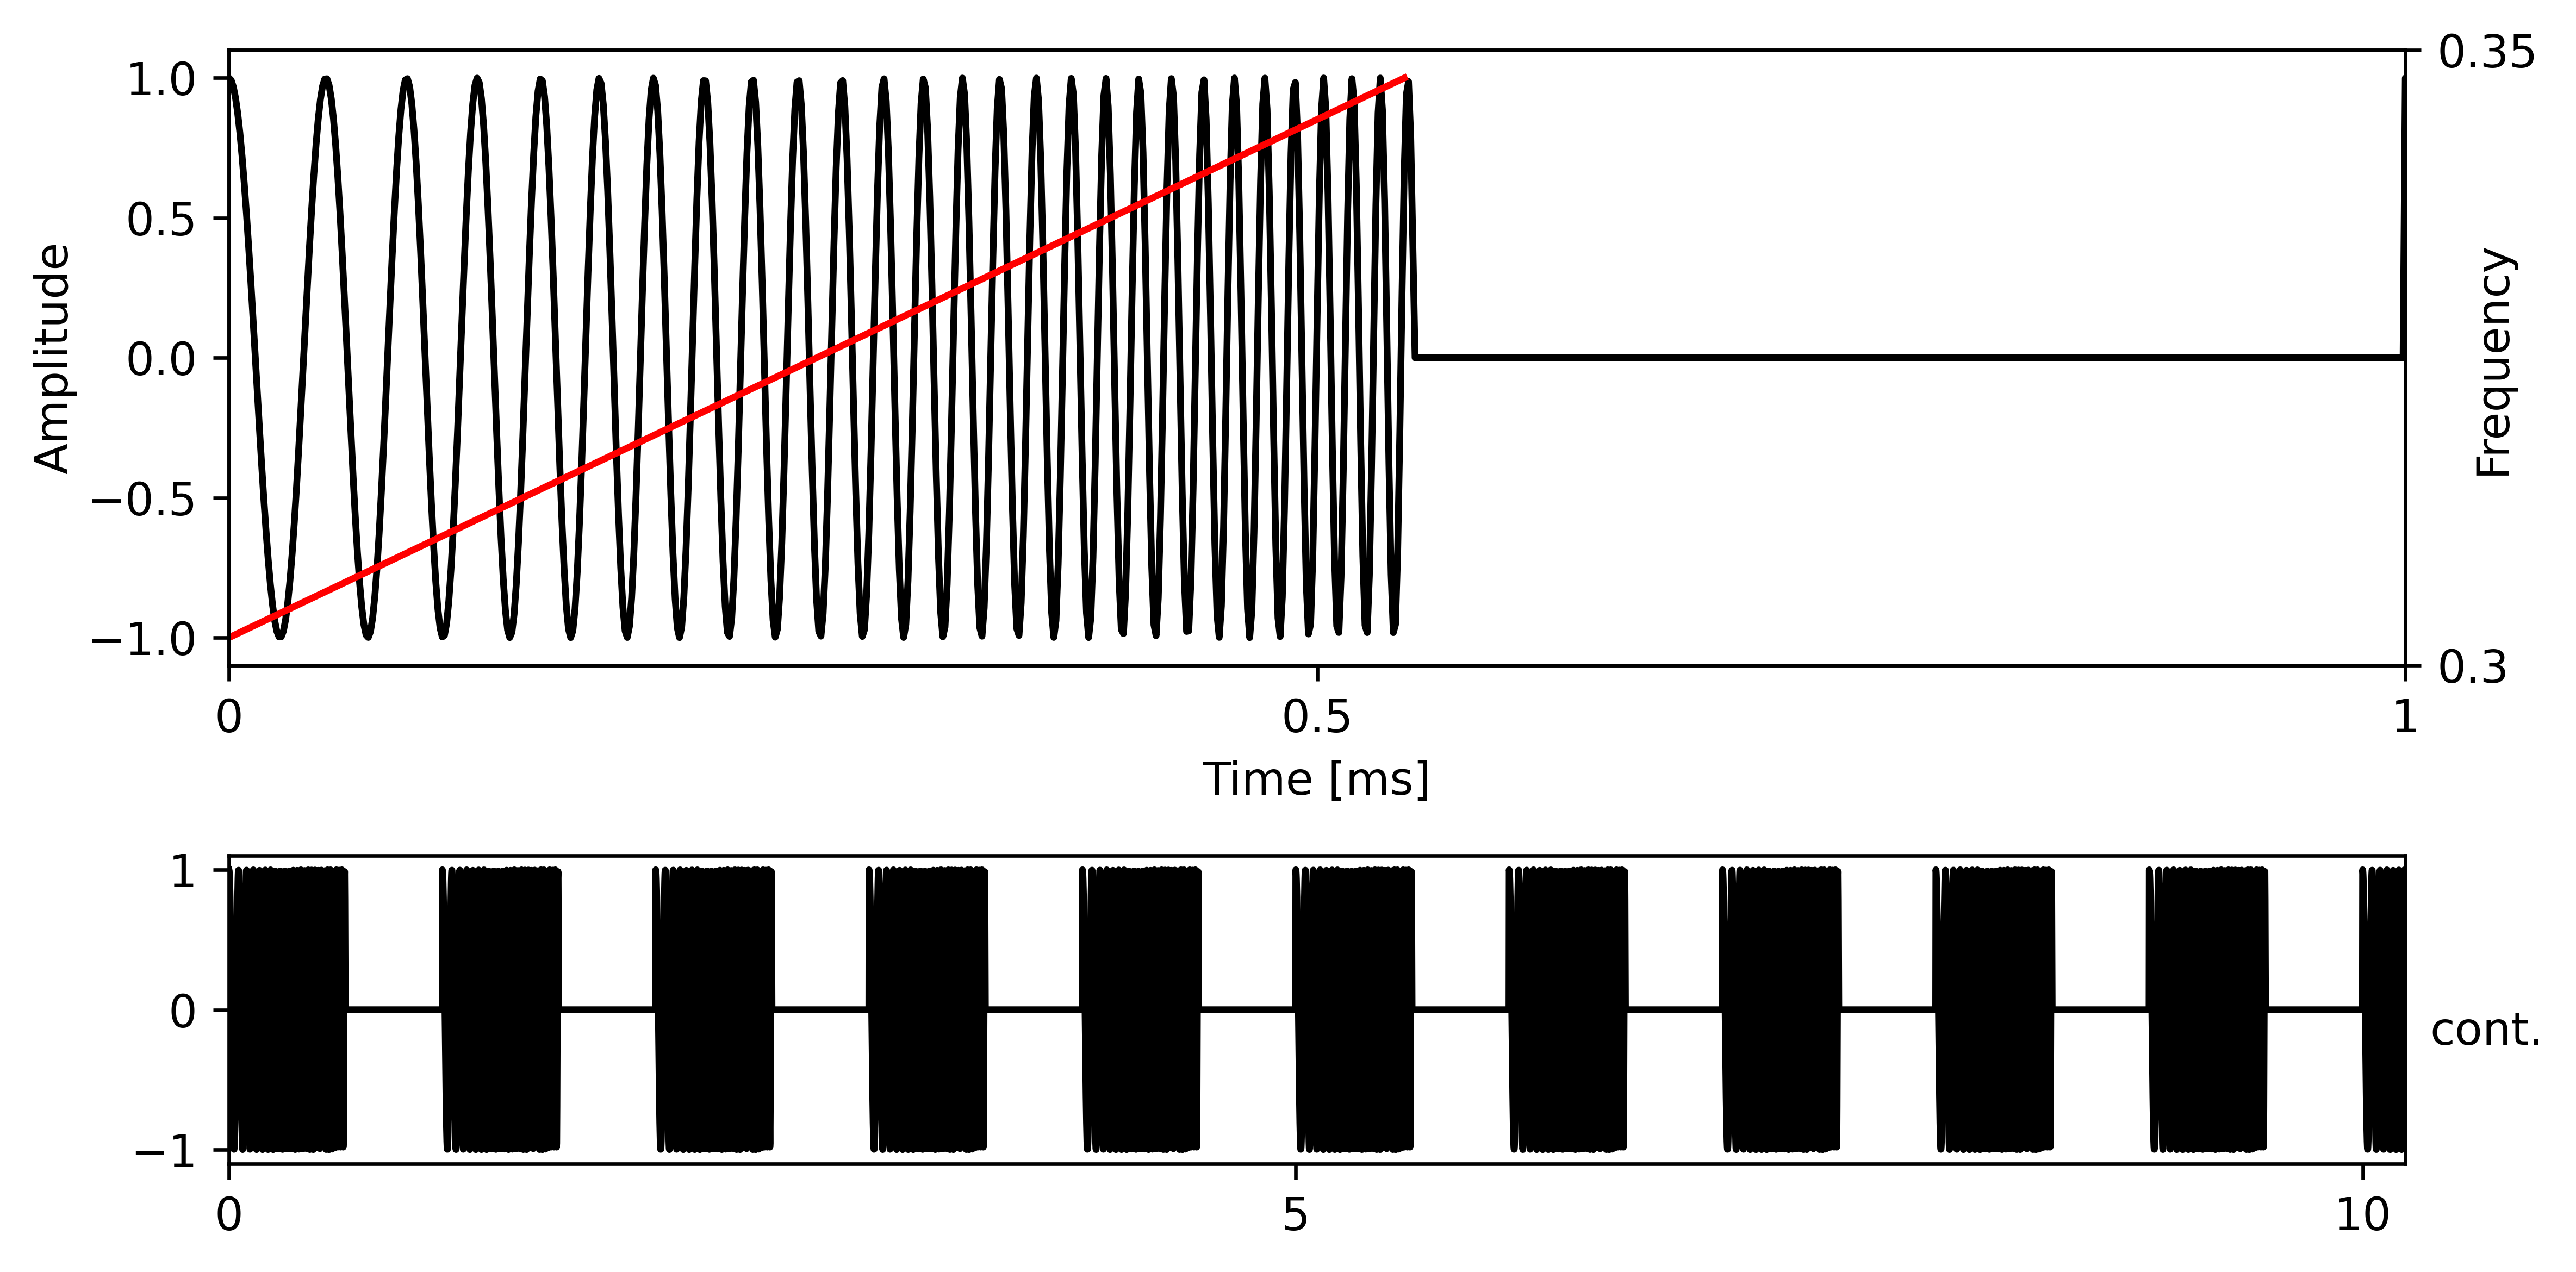

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(8, 4), gridspec_kw={'height_ratios': [1, 0.5]}, tight_layout=True)
ax[0].plot(time, signal[:len(time)], 'k')
ax[0].set_xticks([0, 0.0005, 0.001])
ax[0].set_xticklabels([0, 0.5, 1])
ax[0].set_xlabel('Time [ms]')
ax[0].set_xlim(0, 0.001)
ax[0].set_ylabel("Amplitude")
ax[0].plot((0, 0.00054), (-1, 1), 'r')
ax[0].yaxis.set_label_coords(-0.07, 0.5)
twiny = ax[0].twinx()
twiny.set_yticks([-1, 1])
twiny.set_yticklabels([.3, .35])
twiny.set_ylabel("Frequency")
twiny.yaxis.set_label_coords(1.03, 0.5)

ax[1].plot(time, signal[:len(time)], 'k')
ax[1].set_xlim(0, 0.0102)
ax[1].set_xticks([0, 0.005, 0.01])
ax[1].set_xticklabels([0, 5, 10])
ax[1].set_ylabel("cont.", rotation=0, labelpad=18)
ax[1].yaxis.set_label_position("right")
